In [14]:
import pandas as pd
from fastbook import *
from fastai.tabular.all import *

In [3]:
df_nn = pd.read_csv('../Data/Training/DISCOV_Invasea_V3.csv', low_memory=False,sep=";")

output_name = '../models/DISCOV_InvaSea.pkl'

# Training a new version of DISCOV using a CSV

In [4]:
df_nn = df_nn[df_nn.True_Class != "Xanthophyceae"]

In [5]:
df_nn

,True_Class,Reflectance_444,Reflectance_475,Reflectance_531,Reflectance_560,Reflectance_650,Reflectance_668,Reflectance_705,Reflectance_717,Reflectance_740,...,Reflectance_Stan_531,Reflectance_Stan_560,Reflectance_Stan_650,Reflectance_Stan_668,Reflectance_Stan_705,Reflectance_Stan_717,Reflectance_Stan_740,Reflectance_Stan_842,NDVI_Stan,NDVI
0,Sediment,2423,2993,3510,4089,3634,3377,4102,4370,4442,...,0.360172,0.552021,0.401259,0.316103,0.556329,0.645129,0.668986,1.0,0.519637,0.234067
1,Sediment,2343,2972,3644,4035,3665,3338,4092,4504,4695,...,0.389055,0.505981,0.395335,0.297548,0.523026,0.646232,0.703349,1.0,0.541369,0.260277
2,Sediment,2465,2927,3584,3977,3623,3373,4210,4483,4616,...,0.466639,0.630525,0.482902,0.378649,0.727690,0.841535,0.896997,1.0,0.450696,0.180913
3,Sediment,2416,3050,3753,3950,3513,3406,3979,4391,4401,...,0.504719,0.579086,0.414119,0.373726,0.590034,0.745564,0.749339,1.0,0.455894,0.195845
4,Sediment,2330,2986,3676,4003,3541,3333,4141,4438,4483,...,0.404690,0.503007,0.364101,0.301563,0.544498,0.633794,0.647324,1.0,0.536614,0.258427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160729,Magnoliopsida,1256,1337,1749,1832,1571,1415,2882,3344,4208,...,0.148449,0.173442,0.094851,0.047877,0.489612,0.628726,0.888889,1.0,0.908621,0.527704
1160730,Magnoliopsida,1169,1134,1587,1749,1486,1418,2852,3428,4361,...,0.112996,0.153405,0.087802,0.070841,0.428536,0.572213,0.804939,1.0,0.867692,0.567749
1160731,Magnoliopsida,1240,1221,1611,1773,1679,1537,2914,3556,4406,...,0.088275,0.124943,0.103667,0.071526,0.383205,0.528520,0.720914,1.0,0.866498,0.571628
1160732,Magnoliopsida,1287,1148,1538,1704,1460,1366,2612,3437,3788,...,0.103641,0.147754,0.082913,0.057933,0.389051,0.608291,0.701568,1.0,0.890480,0.564760


In [8]:
dep_var = "True_Class"
splits = RandomSplitter()(df_nn)

In [15]:
cont_nn,cat_nn = cont_cat_split(df_nn, dep_var=dep_var)

In [16]:
procs_nn = [FillMissing]
to_nn = TabularPandas(df_nn, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var, y_block=CategoryBlock())

In [17]:
dls = to_nn.dataloaders()
dls.valid.show_batch()

,Reflectance_444,Reflectance_475,Reflectance_531,Reflectance_560,Reflectance_650,Reflectance_668,Reflectance_705,Reflectance_717,Reflectance_740,Reflectance_842,Reflectance_Stan_444,Reflectance_Stan_475,Reflectance_Stan_531,Reflectance_Stan_560,Reflectance_Stan_650,Reflectance_Stan_668,Reflectance_Stan_705,Reflectance_Stan_717,Reflectance_Stan_740,Reflectance_Stan_842,NDVI_Stan,NDVI,True_Class
0,2007.0,2693.0,3293.0,3694.0,3495.0,2808.0,3796.0,4649.0,4483.0,5338.0,0.0,0.205944,0.386070,0.506455,0.446713,0.240468,0.537076,0.793155,0.743320,1.0,0.612294,0.310582,Bacillariophyceae
1,2414.0,2892.0,3690.0,4101.0,3558.0,3265.0,4089.0,4282.0,4537.0,5300.0,0.0,0.165627,0.442134,0.584546,0.396396,0.294872,0.580388,0.647263,0.735620,1.0,0.544554,0.237595,Sediment
2,2123.0,2548.0,3249.0,3743.0,3205.0,3075.0,4057.0,4317.0,4422.0,5455.0,0.0,0.127551,0.337935,0.486194,0.324730,0.285714,0.580432,0.658463,0.689976,1.0,0.555556,0.279015,Bacillariophyceae
3,2474.0,3124.0,3932.0,4349.0,3851.0,3485.0,4289.0,4893.0,4729.0,5477.0,0.0,0.216450,0.485514,0.624376,0.458541,0.336663,0.604396,0.805528,0.750916,1.0,0.496263,0.222272,Sediment
4,2188.0,2602.0,3587.0,4023.0,3305.0,2979.0,4351.0,4314.0,4470.0,5312.0,0.0,0.132522,0.447823,0.587388,0.357554,0.253201,0.692382,0.680538,0.730474,1.0,0.595913,0.281389,Sediment
5,880.0,1112.0,1463.0,1577.0,1250.0,1087.0,2440.0,3340.0,4684.0,5873.0,0.0,0.046465,0.116763,0.139595,0.074104,0.041458,0.312437,0.492690,0.761867,1.0,0.920385,0.687644,Magnoliopsida
6,1620.0,2211.0,2681.0,2984.0,2536.0,2383.0,2927.0,3167.0,3127.0,3648.0,0.0,0.291420,0.523176,0.672584,0.451677,0.376233,0.644477,0.762821,0.743097,1.0,0.453243,0.209750,Sediment
7,703.0,762.0,901.0,870.0,1163.0,849.0,2523.0,3880.0,7551.0,12379.0,0.0,0.005053,0.016958,0.014303,0.039397,0.012504,0.155875,0.272097,0.586502,1.0,0.975300,0.871636,Phaeophyta
8,2816.0,3439.0,4153.0,4452.0,3763.0,3370.0,4550.0,4791.0,4847.0,5873.0,0.0,0.203795,0.437357,0.535165,0.309781,0.181223,0.567223,0.646058,0.664377,1.0,0.693160,0.270800,Sediment
9,1656.0,2262.0,2767.0,2993.0,2588.0,2464.0,2797.0,3152.0,2919.0,3636.0,0.0,0.306061,0.561111,0.675252,0.470707,0.408081,0.576263,0.755556,0.637879,1.0,0.420373,0.192131,Sediment


In [18]:
y = to_nn.train.y
y.min(),y.max()

(0, 7)

In [12]:
#dls.device=device

In [19]:
learn = tabular_learner(dls,n_out=10)

SuggestedLRs(valley=0.0008317637839354575)

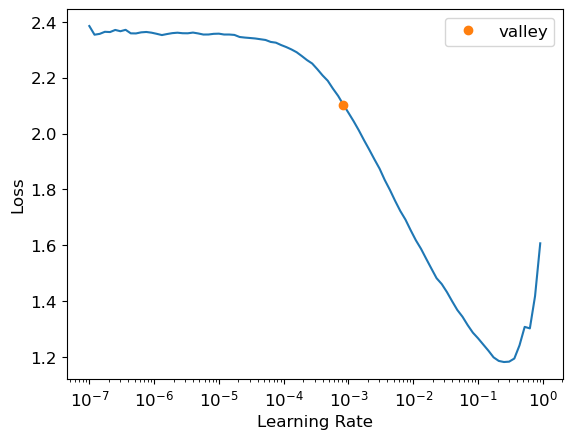

In [20]:
learn.lr_find()

In [21]:
learn.summary()

TabularModel (Input shape: 64 x 0)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 22             
BatchNorm1d                               44         True      
____________________________________________________________________________
                     64 x 200            
Linear                                    4400       True      
ReLU                                                           
BatchNorm1d                               400        True      
____________________________________________________________________________
                     64 x 100            
Linear                                    20000      True      
ReLU                                                           
BatchNorm1d                               200        True      
____________________________________________________________________________
                     64 x 10             
Linear                                    1010       T

In [23]:
learn.fine_tune(12)

epoch,train_loss,valid_loss,time
0,0.077760,0.065612,02:08


epoch,train_loss,valid_loss,time
0,0.069165,0.057546,02:07


In [24]:
preds,targs = learn.get_preds()
preds,targs

(tensor([[7.6056e-01, 4.7421e-07, 1.1563e-04,  ..., 3.6796e-07, 8.9293e-08, 9.3938e-08],
         [6.6790e-04, 2.0776e-08, 1.8779e-06,  ..., 9.9566e-07, 4.6773e-08, 4.3127e-08],
         [2.9396e-01, 1.1964e-05, 4.2816e-04,  ..., 2.0045e-06, 4.8907e-07, 4.7378e-07],
         ...,
         [1.3663e-06, 4.6333e-04, 9.9755e-01,  ..., 5.5767e-09, 1.2119e-07, 1.1210e-07],
         [7.7549e-01, 2.5260e-06, 5.9374e-05,  ..., 3.4678e-06, 1.4651e-07, 1.5162e-07],
         [1.0409e-03, 1.8561e-07, 4.2232e-06,  ..., 3.8318e-08, 5.3561e-08, 5.2309e-08]]),
 tensor([[0],
         [5],
         [0],
         ...,
         [2],
         [0],
         [5]], dtype=torch.int8))

In [25]:
error_rate(preds, targs)

TensorBase(0.0206)

In [26]:
learn.export(output_name)